# Underwriting In The Credit Industry

In [1]:
import numpy as np
import pandas as pd
import seaborn as  sn
import matplotlib.pyplot as plt
sn.set_style('whitegrid')

In [2]:
df = pd.read_table('lendingdata.txt', parse_dates = ['issue_d'],low_memory = False)

In [3]:
df.shape

(855969, 73)

In [10]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
id                             855969 non-null int64
member_id                      855969 non-null int64
loan_amnt                      855969 non-null float64
funded_amnt                    855969 non-null float64
funded_amnt_inv                855969 non-null float64
term                           855969 non-null object
int_rate                       855969 non-null float64
installment                    855969 non-null float64
grade                          855969 non-null object
sub_grade                      855969 non-null object
emp_title                      806526 non-null object
emp_length                     812908 non-null object
home_ownership                 855969 non-null object
annual_inc                     855969 non-null float64
verification_status            855969 non-null object
issue_d                        855969 non-null object
pymnt_plan           

We have data of those persons to whom loan has issued. The default_ind column has the values '0' and '1' that specify whether they are able to repay the loan or not.

In [13]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [14]:
 df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

# Exploratory data analysis

In [16]:
df['default_ind'].value_counts()
#0 = successfully paid

0    809502
1     46467
Name: default_ind, dtype: int64

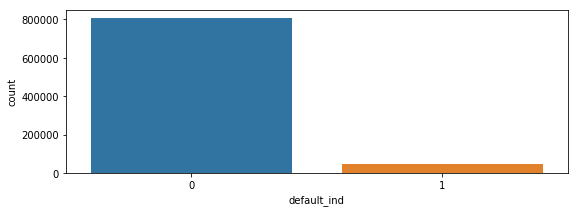

In [19]:
plt.figure(figsize = (9,3))
sn.countplot( x= 'default_ind', data = df)

We see that out of 855969 people  more than 8 lac people sucsessfully repayed the loan

In [4]:
df['addr_state'].value_counts()

CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: addr_state, dtype: int64

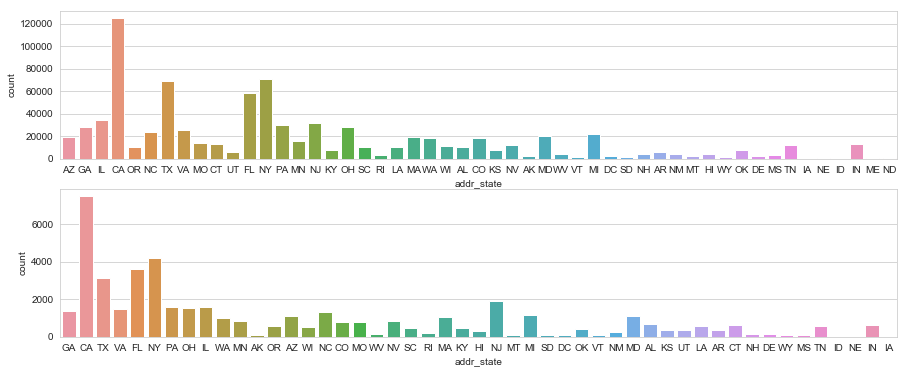

In [5]:
sn.set_style('whitegrid')
plt.figure(figsize = (15,6))
plt.subplot(2,1,1)
sn.countplot(x = 'addr_state', data = df)
#defaulters----
plt.subplot(2,1,2)
sn.countplot(x = 'addr_state', data = df[(df['default_ind'] == 1)])

Majority of people who applied for the loan were from CA

annual_inc - The self-reported annual income provided by the borrower during registration.

In [5]:
df['annual_inc'].describe()

count    8.559690e+05
mean     7.507119e+04
std      6.426447e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

In [27]:
df['annual_inc'].max()

9500000.0

In [31]:
df[(df['annual_inc'] >= 9000000.0)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
484053,65945334,70640084,11000.0,11000.0,11000.0,36 months,6.89,339.10,A,A3,...,NaN,NaN,NaN,NaN,NaN,41900.0,NaN,NaN,NaN,0
671886,54067210,57607924,24000.0,24000.0,24000.0,60 months,7.89,485.38,A,A5,...,NaN,NaN,NaN,NaN,NaN,84200.0,NaN,NaN,NaN,0


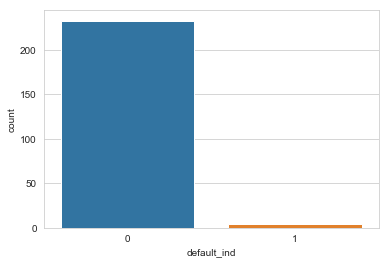

In [4]:
sn.countplot( x= "default_ind", data = df[(df['annual_inc'] >=900000.0)])

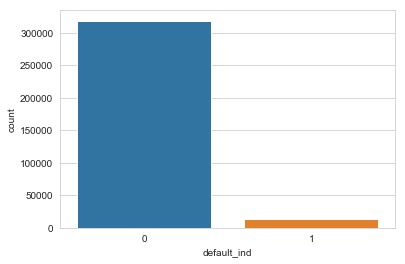

In [6]:
sn.countplot( x= "default_ind", data = df[(df['annual_inc'] >=73859)])

There are very few people whose salary > 73859 and still not repayed the loan, majority of the people are non defaulters

annual_inc_joint - Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [7]:
df['annual_inc_joint'].isnull().sum()

855527

Lots of na values, lets leave it for now

application_type - Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [9]:
df.loc[df['default_ind'] == 1,'application_type'].value_counts()
#People who applied jointly are not defaulters

INDIVIDUAL    46467
Name: application_type, dtype: int64

desc and delinq_2 yrs are not providing any useful information, leave it for now

dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.

DTI = total of money debt payments(credict cards, lians mortgage etc)/gross monthly income
(banks prefer less dti)

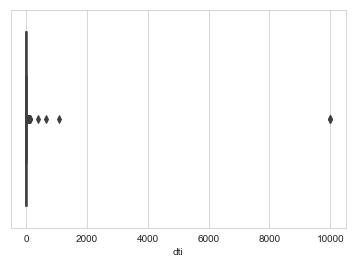

In [11]:
sn.boxplot(df['dti'])

In [ ]:
data=dataset[(dataset.dti>=100)]
data['dti']
#There are outliers too that needed to be replaced by some central tendencies

In [15]:
df.loc[df['default_ind'] ==0, 'dti'].mean()

18.10367739672037

dti_joint and member_id are not providing any relevant info, leave them for now

In [ ]:
plt.figure(figsize = (10,5))

H:\Anaconda_work\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Amount Funded')

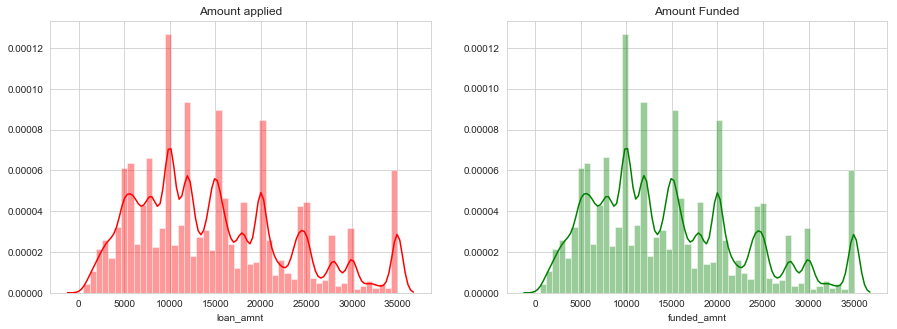

In [14]:
#loan amount and funded amount are same, i.e what was applied for they got.
fig,ax = plt.subplots(1,2, figsize =(15,5))
sn.distplot( df['loan_amnt'], ax = ax[0],color ='red')
sn.distplot( df['funded_amnt'], ax = ax[1], color =  'green')
ax[0].set_title("Amount applied")
ax[1].set_title("Amount Funded")

In [ ]:
#funded amount-------
#funded amnt and loan amnt are same so we need only b/w these two

In [18]:
df.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv']].head(10)

,loan_amnt,funded_amnt,funded_amnt_inv
0,5000.0,5000.0,4975.0
1,2500.0,2500.0,2500.0
2,2400.0,2400.0,2400.0
3,10000.0,10000.0,10000.0
4,3000.0,3000.0,3000.0
5,5000.0,5000.0,5000.0
6,7000.0,7000.0,7000.0
7,3000.0,3000.0,3000.0
8,5600.0,5600.0,5600.0
9,5375.0,5375.0,5350.0


Employement length------
frequency of people who applied for loan based on their emp length

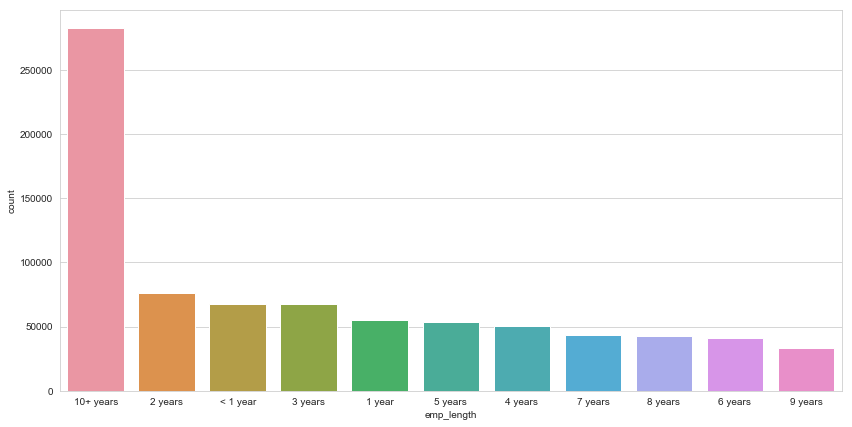

In [4]:
plt.figure(figsize=(14,7))
sn.countplot(x='emp_length',data=df,order=df['emp_length'].value_counts().index)

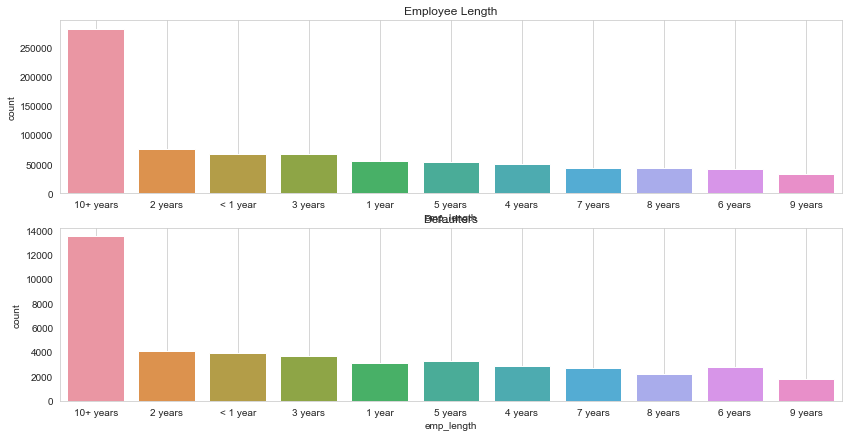

In [6]:
#Comparing no. of defaulters with employement length
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)

sn.countplot(x='emp_length',data=df,order=df['emp_length'].value_counts().index)
plt.title("Employee Length")
plt.grid()

plt.subplot(2,1,2)
sn.countplot(x='emp_length',data=df[(df['default_ind']==1 )],order=df['emp_length'].value_counts().index)
plt.title("Defaulters")
plt.grid()

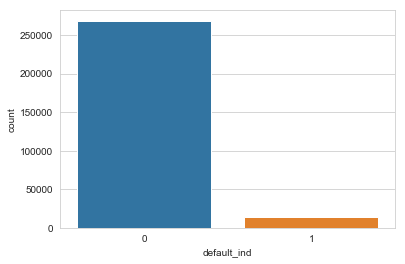

In [8]:
#Defulters and non-defaulters having 10+ years of employement length
sn.countplot(x='default_ind',data=df[(df['emp_length']=='10+ years' )])

Majority of people who have 10+ years of employment length are non defaulters

emp_title - The job title supplied by the Borrower when applying for the loan.

In [10]:
df['emp_title'].value_counts()

Teacher                                  12965
Manager                                  10821
Registered Nurse                          5341
RN                                        5182
Owner                                     5157
Supervisor                                4792
Sales                                     4051
Project Manager                           3856
Driver                                    3417
Office Manager                            3404
Director                                  3067
General Manager                           3060
manager                                   2994
teacher                                   2820
owner                                     2727
Engineer                                  2574
President                                 2478
driver                                    2319
Vice President                            2283
Attorney                                  2074
Operations Manager                        1995
Accountant   

grade - XYZ corp. assigned loan grade

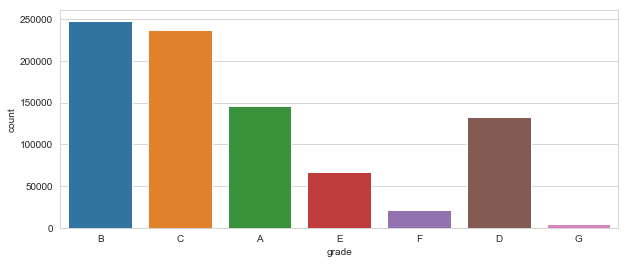

In [21]:
plt.figure(figsize =(10,4))
sn.countplot(df['grade'])

In [19]:
df.loc[df['default_ind'] == 1,'grade'].value_counts()

C    13002
D    10798
B     9717
E     6459
F     3013
A     2664
G      814
Name: grade, dtype: int64

In [ ]:
#C grade have max defaulters

home_ownership - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [22]:
df['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

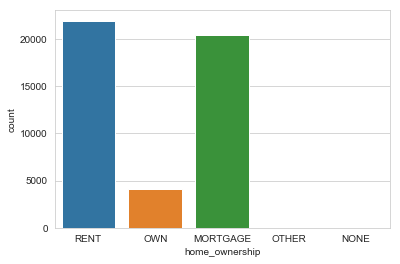

In [23]:
#defaulters on the basis of home ownership-------
#default_ind =1 (defaulters)
sn.countplot(x = 'home_ownership', data = df[(df['default_ind'] == 1)])

1. Majority of the defaulters are rentees
2. Around 4000 people with their own houses haven't repayed the loan yet i.e are defaulters

In [11]:
#initial listing status-------
df['initial_list_status'].value_counts()

f    442555
w    413414
Name: initial_list_status, dtype: int64

installment - The monthly payment owed by the borrower if the loan originates.

In [25]:
df['installment'].head(5)

0    162.87
1     59.83
2     84.33
3    339.31
4     67.79
Name: installment, dtype: float64

In [13]:
print(df.loc[df.default_ind==1,'installment'].mean())
print(df.loc[df.default_ind==0,'installment'].mean())

441.07321884347874
435.9605249278156


Average installment is same for both defaulters and non-defaulters 

int_rate - Interest Rate on the loan

In [30]:
df['int_rate'].describe()

count    855969.000000
mean         13.192320
std           4.368365
min           5.320000
25%           9.990000
50%          12.990000
75%          15.990000
max          28.990000
Name: int_rate, dtype: float64

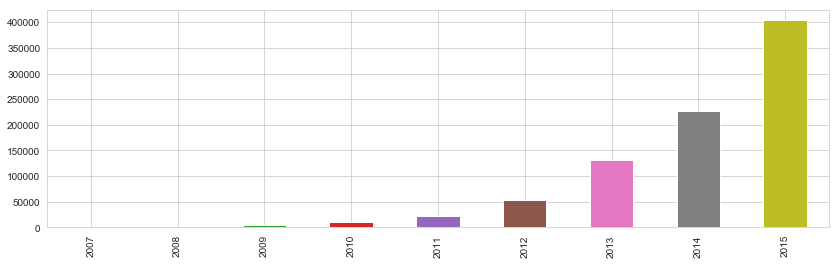

In [17]:
#issue_d -------
#Loan issued per year
plt.figure(figsize =(14,4))
df['issue_d'].dt.year.value_counts().sort_index().plot.bar()

As per the data we have we see that loans are increasing per year with maximum no. of loans issued in 2015

In [18]:
df.loc[df['default_ind'] ==1,'last_credit_pull_d']

1         Sep-2013
8         Aug-2012
9         Mar-2013
12        Nov-2012
14        Mar-2014
21        Jan-2016
24        Mar-2013
26        Jan-2016
27        May-2013
46        Dec-2014
50        Mar-2015
53        Dec-2012
55        Jan-2016
64        Jun-2015
66        Jan-2016
68        Oct-2013
71        Jan-2016
97        Dec-2015
100       May-2013
105       Jan-2016
114       Jan-2015
120       Jul-2015
121       Nov-2013
124       Sep-2014
131       Jan-2016
137       Mar-2014
145       Oct-2015
151       Nov-2013
153       Jan-2016
155       Jan-2016
            ...   
855236    Jan-2016
855257    Apr-2015
855336    Jan-2016
855387    Dec-2015
855407    Jan-2016
855418    Jan-2016
855434    Jan-2016
855477    Dec-2015
855487    Dec-2015
855548    Jun-2015
855556    Jan-2016
855610    Aug-2015
855622    Dec-2015
855657    May-2015
855704    Jan-2016
855710    Sep-2015
855729    Jan-2016
855730    Dec-2015
855755    Jan-2016
855778    Jan-2016
855791    Dec-2015
855850    Ja

In [38]:
#loan amount deatails
df['loan_amnt'].describe()

count    855969.000000
mean      14745.571335
std        8425.340005
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

In [41]:
# open_acc
df['open_acc'].describe()

count    855969.000000
mean         11.542447
std           5.308094
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64

In [42]:
#policy code
df['policy_code'].value_counts()

1.0    855969
Name: policy_code, dtype: int64

In [ ]:
#All values are same in policy_code, lets leave it for now

In [19]:
#public records
df['pub_rec'].describe()

count    855969.000000
mean          0.194537
std           0.581585
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

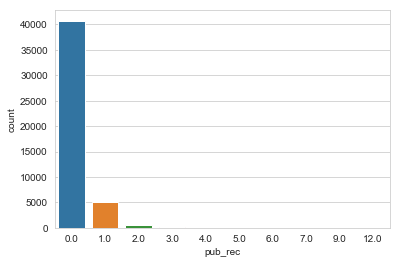

In [47]:
sn.countplot(x= 'pub_rec', data = df[(df['default_ind']==1)])

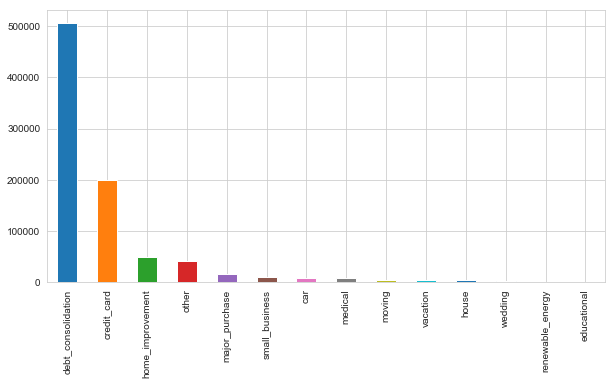

In [48]:
#purpose----
df.purpose.value_counts(ascending=False).plot.bar(figsize=(10,5))

Mostly the loan was issued for debt_consolidation

In [49]:
#Payment plan
df['pymnt_plan'].value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

Most of the values are 'n', so not needed.Same is for 'recoveries'

sub_grade - XYZ assigned assigned loan subgrade

In [50]:
df['sub_grade'].value_counts()

B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: sub_grade, dtype: int64

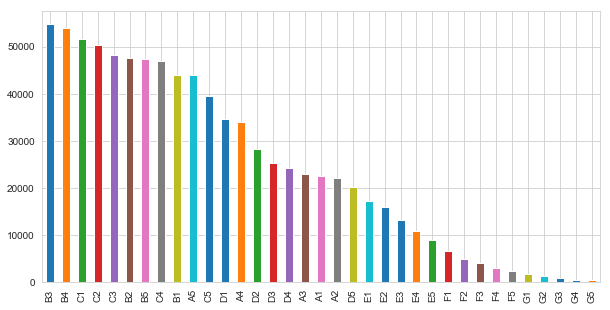

In [58]:
df.sub_grade.value_counts(ascending=False).plot.bar(figsize=(10,5),)

term - The number of payments on the loan. Values are in months and can be either 36 or 60.

In [56]:
df['term'].value_counts()

 36 months    600221
 60 months    255748
Name: term, dtype: int64

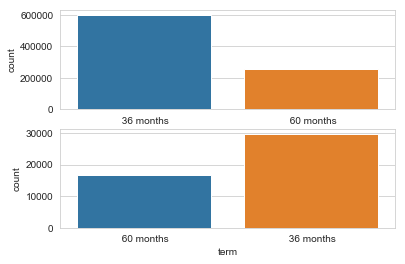

In [21]:
plt.subplot(2,1,1)
sn.countplot(x='term',data=df)
plt.subplot(2,1,2)
sn.countplot(x='term',data=df[(df.default_ind==1)])

In [59]:
#total_acc
df['total_acc'].isnull().sum()

0

In [60]:
df['total_acc'].value_counts()

22.0     31159
20.0     30955
21.0     30917
19.0     30545
23.0     30213
18.0     30031
24.0     29986
17.0     29671
25.0     28660
16.0     28143
26.0     28049
15.0     26907
27.0     26683
14.0     25390
28.0     25243
29.0     24226
13.0     23828
30.0     23012
12.0     21341
31.0     21286
32.0     20198
11.0     19216
33.0     18462
34.0     17301
10.0     16760
35.0     15916
36.0     14662
9.0      14138
37.0     13598
38.0     12141
         ...  
113.0        3
100.0        3
116.0        3
104.0        2
107.0        2
109.0        2
112.0        1
138.0        1
137.0        1
125.0        1
135.0        1
156.0        1
126.0        1
130.0        1
129.0        1
103.0        1
140.0        1
150.0        1
146.0        1
121.0        1
114.0        1
151.0        1
119.0        1
118.0        1
162.0        1
108.0        1
111.0        1
169.0        1
117.0        1
127.0        1
Name: total_acc, Length: 134, dtype: int64

In [63]:
df['total_acc'].describe()

count    855969.000000
mean         25.269269
std          11.818841
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         169.000000
Name: total_acc, dtype: float64

In [71]:
df['total_rec_int'].value_counts()

0.00        9362
82.76        138
174.90       123
71.33        123
283.29       119
41.37        113
130.12       112
258.02       108
194.92       108
319.41       107
451.32       106
79.47        104
475.52       102
122.73       102
510.60        98
358.33        94
390.61        94
383.29        93
158.96        92
527.97        92
49.65         91
145.89        88
218.59        88
429.99        87
308.02        87
364.36        85
497.15        85
146.88        83
153.41        83
173.19        83
            ... 
421.55         1
11888.32       1
519.82         1
1946.30        1
4174.29        1
6650.73        1
1035.53        1
1503.52        1
5386.83        1
9027.62        1
6533.52        1
6690.19        1
75.08          1
1637.57        1
5720.57        1
8616.02        1
14533.99       1
15903.72       1
3976.07        1
3740.09        1
4738.81        1
908.14         1
2979.67        1
461.74         1
5162.17        1
2271.47        1
9803.06        1
4178.21       

Again title is of no use, leave it for now

verification_status - Was the income source verified

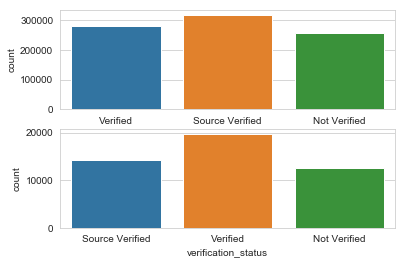

In [26]:
plt.subplot(2,1,1)

sn.countplot(x = 'verification_status', data = df)

plt.subplot(2,1,2)

sn.countplot(x = 'verification_status', data = df[(df['default_ind'] == 1)])

Max defaulters in the verified section

# Data Cleaning and Feature Engineering

In [31]:
df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

There are many columns with na values that are not worth lets drop them

In [32]:
drop_list=['emp_title','desc','title','mths_since_last_delinq','mths_since_last_record','revol_util','last_pymnt_d',
 'next_pymnt_d','last_credit_pull_d','annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt',
'tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc',
 'all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','application_type','delinq_2yrs','collections_12_mths_ex_med','collection_recovery_fee','earliest_cr_line','loan_amnt', 'funded_amnt_inv','id','member_id','inq_last_6mths','zip_code','mths_since_rcnt_il', 'mths_since_last_major_derog','acc_now_delinq','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp','policy_code','pub_rec','pymnt_plan','sub_grade','open_acc','out_prncp',
       'out_prncp_inv', 'total_rec_int', 'total_rec_late_fee','revol_bal', 'total_acc','issue_d']

df.drop(drop_list,axis=1,inplace=True)

In [33]:
df.columns

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'initial_list_status', 'recoveries',
       'last_pymnt_amnt', 'default_ind'],
      dtype='object')

In [34]:
df.shape

(855969, 16)

In [35]:
df['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

In [36]:
#merging other, none and any together
df['home_ownership']=df['home_ownership'].replace(['OTHER','NONE','ANY'],'OTHER')

In [37]:
df['home_ownership'].value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          192
Name: home_ownership, dtype: int64

In [38]:
df['purpose'].value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [39]:
df['purpose']=df['purpose'].replace(['major_purchase','small_business','car','medical','moving','vacation','house','wedding','renewable_energy','educational'],'others')

In [40]:
df['purpose'].value_counts()

debt_consolidation    505392
credit_card           200144
others                 59528
home_improvement       49956
other                  40949
Name: purpose, dtype: int64

In [41]:
df['addr_state'].value_counts()

CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: addr_state, dtype: int64

In [42]:
df['dti'].median()

17.61

Relace the outliers with median

In [43]:
df.loc[[454491,455963,462577,466829,498969,508976,509784,517482,521134,540528],'dti'] = 17

In [44]:
data=df[(df.dti>=100)]
data['dti']
df['dti'].mean()

18.095807593499064

In [46]:
df.isnull().sum()

funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length             43061
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
addr_state                 0
dti                        0
initial_list_status        0
recoveries                 0
last_pymnt_amnt            0
default_ind                0
dtype: int64

In [47]:
df['emp_length'].fillna(value='10+ years',inplace=True)

# Data Preprocessing

In [48]:
df.shape

(855969, 16)

In [50]:
x=df.iloc[:,:-1].values
y=df.iloc[:,15].values

In [51]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder=LabelEncoder()

x[:,1]=labelencoder.fit_transform(x[:,1])
x[:,4]=labelencoder.fit_transform(x[:,4])
x[:,5]=labelencoder.fit_transform(x[:,5])
x[:,6]=labelencoder.fit_transform(x[:,6])
x[:,8]=labelencoder.fit_transform(x[:,8])
x[:,9]=labelencoder.fit_transform(x[:,9])
x[:,10]=labelencoder.fit_transform(x[:,10])
x[:,12]=labelencoder.fit_transform(x[:,12])

In [53]:
onehotencoder=OneHotEncoder(categorical_features=[1,4,5,6,8,9,10])
x=onehotencoder.fit_transform(x).toarray()

H:\Anaconda_work\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
H:\Anaconda_work\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [54]:
x.shape

(855969, 91)

# Model Building

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

Its a classification problem so applying GradientBoostingClassifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier()
classifier.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [61]:
y_pred=classifier.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9741253218563224

# Cross Validation

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    202450
           1       1.00      0.52      0.68     11543

   micro avg       0.97      0.97      0.97    213993
   macro avg       0.99      0.76      0.84    213993
weighted avg       0.97      0.97      0.97    213993



In [64]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[202449,      1],
       [  5536,   6007]], dtype=int64)

# Final observations

1. Out of 855969 people  more than 8 lac people sucsessfully repayed the loan, so loan can be easily issued to majority of the population
2. We see that more than 120000 people were from CA, and around 60000 people were from NY and TX,but people from CA consist mainly of defaulters
3. The average annual income is 73859 , and were able to successfully repay the loan.So bank can easy grant loan to people with annual income > 73859.
4. Joint applicants have susuccessfully repayed the loan, so loan for joint cases can be easily granted. 
5. DTI less than 36% is favourable and our mean dti is 18.44 which is a good ratio
6. People with 10+ years of employment length were non defaulters.This feature is a good parameter when issuing loans.
7. C grade majority consist of defaulters, so bank needs to be a bit careful when issuing loans to them.
8. People with their own houses can be easily granted loans
9. Rentees consist majority of defaulters, so it can be risky to grant loan to them.